# Parcial 1 Grupo 1

- Nombre: Dimar Gabriel Lopez Chiri

> Busque su nombre en el archivo excel adjunto y aplique de acuerdo al siguiente orden de prioridad el modelo respectivo (Clasificacion One vs All, Clasificación, Regresion Polinómica, Regresion Multiple, Regresion Lineal), se debe aplicar obligatoriamente los pasos de preprocesado y optimizacion revisados en clase. 

Se deben desarrollar modelos para dos dataset.

Los dos primeros numeros que se encuentran en la columna D1 y D2 son a las que debe aplicar el modelo, sin embargo si cualquiera de numeros de dataset asignados, corresponde a un dataset que usted utilizo y registro en los respectivos laboratorios, debe utilizar el D3, D4, D5 o D6 respectivamente.

Las respuestas deben ser defendidas en el horario establecido para el examen, las cuales deben ser realizadas en un cuadernillo en google collab, donde se debe considerar solamente incluir el texto que corresponda a la explicacion que propone como respuesta.

Se debe subir todo a ecampus ademas de utilizar github para lograr un versionamiento del trabajo.

| ID | Nombre | Enlace | Descripción |
|----|--------|--------|-------------|
| 34 | Lopez Chiri Dimar Gabriel (73418588) | - | - |
| 34 | CDC Diabetes Health Indicators | [Link](https://www.kaggle.com/code/alexteboul/diabetes-health-indicators-dataset-notebook) | Análisis predictivo de factores de riesgo para diabetes y prediabetes utilizando indicadores de salud. |
| 110 | honey purity dataset | [Link](https://www.kaggle.com/datasets/stealthtechnologies/predict-purity-and-price-of-honey?resource=download) | teniendo datos multiples relacionados a la miel, se desea Predecir el precio de la miel |
| 186 | sign-language-mnist | [Link](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease) | encontrar patrones para language de señas |
| 37 | Clash Royale S18 Ladder Datasets for prediction | [Link](https://www.kaggle.com/datasets/tristanwassner/clash-royale-s18-ladder-datasets-for-prediction/data) | Calcular la cantidad de coronas de Clash Royale |
| 113 | Hotel Reservations Dataset | [Link](https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset) | Número total de solicitudes especiales realizadas por el cliente |
| 189 | Smart Home Dataset with weather Information | [Link](https://www.kaggle.com/datasets/taranvee/smart-home-dataset-with-weather-information/) | Se busca medir el consumo de enegia de los electrodomesticos de un hogar en un tiempo determinado. |

In [23]:
#Librerías necesarias para el funcionamiento
import os
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from sklearn.metrics import mean_squared_error



In [24]:
# Leer el archivo CSV por pandas y tomar 20000 datos
data = pd.read_csv('/home/dilpz/Documentos/SIS420-2024/datasets/honey_purity_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [25]:
# describe the data 
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [26]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [27]:
data.info()

#imprimir pollen analisis
print(data['Pollen_analysis'][:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  int64  
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 20.8 MB
0     3
1     1
2     6
3     3
4     1
5     4
6    15
7     6
8    12
9     3
Name: Pollen_analysis, dtype: int64


In [28]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42) 

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198322 entries, 177226 to 121958
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               198322 non-null  float64
 1   Density          198322 non-null  float64
 2   WC               198322 non-null  float64
 3   pH               198322 non-null  float64
 4   EC               198322 non-null  float64
 5   F                198322 non-null  float64
 6   G                198322 non-null  float64
 7   Pollen_analysis  198322 non-null  int64  
 8   Viscosity        198322 non-null  float64
 9   Purity           198322 non-null  float64
 10  Price            198322 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 18.2 MB


In [30]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49581 entries, 29002 to 13778
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CS               49581 non-null  float64
 1   Density          49581 non-null  float64
 2   WC               49581 non-null  float64
 3   pH               49581 non-null  float64
 4   EC               49581 non-null  float64
 5   F                49581 non-null  float64
 6   G                49581 non-null  float64
 7   Pollen_analysis  49581 non-null  int64  
 8   Viscosity        49581 non-null  float64
 9   Purity           49581 non-null  float64
 10  Price            49581 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 4.5 MB


In [31]:
# Lectura de Datos
X = train_data.iloc[:, :10]
y = train_data.iloc[:, 10]
m = y.size

In [32]:
print(X)

          CS  Density     WC    pH    EC      F      G  Pollen_analysis  \
177226  7.20     1.23  23.60  7.22  0.89  24.56  26.84               12   
48658   6.13     1.69  22.49  7.12  0.79  36.22  39.36                1   
67960   6.12     1.38  19.60  3.28  0.89  45.38  32.26                9   
107825  2.02     1.54  12.57  6.88  0.81  48.59  31.65                3   
158314  4.29     1.31  17.36  4.14  0.80  39.13  38.72                5   
...      ...      ...    ...   ...   ...    ...    ...              ...   
119879  2.43     1.68  21.70  6.95  0.74  20.18  22.15                8   
103694  8.07     1.67  19.84  4.06  0.83  46.96  37.37                6   
131932  2.91     1.62  20.79  2.68  0.70  20.01  44.90               15   
146867  8.46     1.78  15.13  6.29  0.78  28.92  29.97                3   
121958  6.61     1.31  16.05  6.74  0.84  24.14  24.58               15   

        Viscosity  Purity  
177226    4683.17    0.66  
48658     5151.26    0.99  
67960     9761.

In [33]:
print(y)

177226    166.35
48658     429.15
67960     926.30
107825    600.73
158314    684.45
           ...  
119879    442.21
103694    768.28
131932    564.12
146867    626.30
121958    838.98
Name: Price, Length: 198322, dtype: float64


In [34]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [35]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = normalizarCaracteristicas(X)

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

Media calculada: CS                    5.503066
Density               1.535493
WC                   18.505325
pH                    4.996807
EC                    0.799969
F                    34.965642
G                    32.503505
Pollen_analysis       8.993934
Viscosity          5753.095768
Purity                0.824766
dtype: float64
Desviación estandar calculada: CS                    2.591939
Density               0.187681
WC                    3.746915
pH                    1.444666
EC                    0.057960
F                     8.658997
G                     7.224685
Pollen_analysis       5.473384
Viscosity          2456.034734
Purity                0.139476
dtype: float64
              CS   Density        WC        pH        EC         F         G  \
177226  0.654697 -1.627720  1.359699  1.538897  1.553327 -1.201714 -0.783910   
48658   0.241878  0.823241  1.063455  1.469677 -0.171994  0.144862  0.949037   
67960   0.238020 -0.828494  0.292154 -1.188376  1.553327  1.20

In [36]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [37]:
# No olvidarse agregar unos a la matriz de x
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [38]:
print(X)

[[ 1.00000000e+00  6.54696543e-01 -1.62772010e+00 ...  5.49215208e-01
  -4.35631367e-01 -1.18132383e+00]
 [ 1.00000000e+00  2.41878240e-01  8.23241222e-01 ... -1.46051030e+00
  -2.45043671e-01  1.18468016e+00]
 [ 1.00000000e+00  2.38020125e-01 -8.28493583e-01 ...  1.10825269e-03
   1.63216512e+00  1.25637726e+00]
 ...
 [ 1.00000000e+00 -1.00043479e+00  4.50268847e-01 ...  1.09732216e+00
   8.77656249e-01 -1.32471801e+00]
 [ 1.00000000e+00  1.14081903e+00  1.30277713e+00 ... -1.09510566e+00
   1.41487178e+00 -1.18132383e+00]
 [ 1.00000000e+00  4.27067759e-01 -1.20146596e+00 ...  1.09732216e+00
   9.53730092e-01  8.97891802e-01]]


In [39]:
# Costo y Decenso por el gradiente con regularización
def computeCostMultiWithReg(X, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * (np.sum(np.square(h - y)) + lambda_ * np.sum(np.square(theta)))

    return J

def gradientDescentMultiWithReg(X, y, theta, alpha, num_iters, lambda_):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * ((np.dot(X, theta) - y).dot(X) + lambda_ * theta)
        J_history.append(computeCostMultiWithReg(X, y, theta, lambda_))

    return theta, J_history

theta calculado por el descenso por el gradiente: [ 5.90848018e+02  4.47371287e-01 -1.41399324e+00 -6.22831113e-01
 -1.13965979e+00 -5.61285977e-02 -5.84750389e-01 -1.09894591e+00
  1.30681138e+01  8.29125675e-01  9.94012663e+01]
702.8785899249735


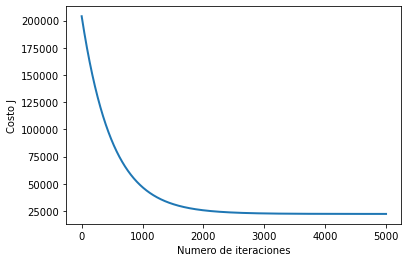

In [40]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000
lambda_ = 100
# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(11)

#theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
theta, J_history = gradientDescentMultiWithReg(X, y, theta, alpha, num_iters, lambda_)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1, 6.68,1.38,12.6,5.94,0.72,47.95,26.4, 3,4908.49,1.0]
X_array[1:11] = (X_array[1:11] - mu) / sigma

price = np.dot(X_array, theta)
print(format(price))

In [41]:
# Preparar los datos de prueba
X_test = test_data.iloc[:, :10]
y_test = test_data.iloc[:, 10]

# Normalizar las características
X_test = (X_test - mu) / sigma

# Añadir una columna de unos al principio para el término de sesgo
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

# Hacer la predicción
price = np.dot(X_test, theta)

# Calcular la precisión
mse = mean_squared_error(y_test, price)
print(f'Error cuadrático medio en el conjunto de prueba: {mse:.2f}')

Error cuadrático medio en el conjunto de prueba: 43994.48


In [42]:
#Utilizando la ecuacion de la normal , se declara otra vez X porque la anterior esta normalizada
X = train_data.iloc[:, :10]
y = train_data.iloc[:, 10]

In [43]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [44]:
# Calcula los parametros con la ecuación de la normal 
theta = normalEqn(X, y );

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el precio para la miel con las siguientes caracteristicas

X_array = [6.68,1.38,12.6,5.94,0.72,47.95,26.4, 3,4908.49,1.0]
price = np.dot(X_array, theta)

print(format(price))

Theta calculado a partir de la ecuación de la normal: [ 2.45993734e-02 -5.70798425e+00 -1.53218764e-01 -1.26822096e-01
 -4.59119606e+00 -7.47501497e-02 -1.63018730e-01  2.39796463e+00
  3.06188277e-04  7.22029980e+02]
709.1365963051348
